In [1]:
# import lib 
import pandas as pd
import io
import requests
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from   sklearn.decomposition import PCA
import seaborn    as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl;mpl.style.use('seaborn')

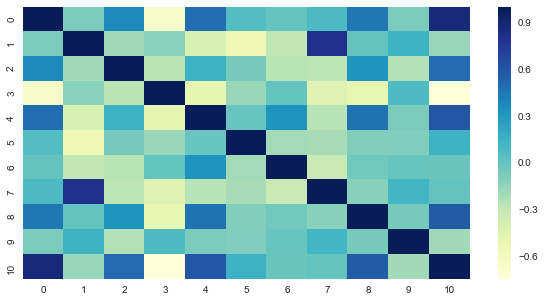

In [2]:
# read data from url
# https://archive.ics.uci.edu/ml/datasets/Glass+Identification
glass_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data',header=None)
plt.figure(figsize=(10,5));sns.heatmap(glass_data.corr(),cmap='YlGnBu');plt.show()

In [3]:
# view the data in numpy
gladd_data_np = np.asarray(glass_data).astype(np.float32)
print(gladd_data_np.shape)

gladd_data_2d     = np.hstack((gladd_data_np[:,1][:,None],gladd_data_np[:,7][:,None]))
gladd_data_2d_cen = gladd_data_2d - gladd_data_2d.mean(0)
print(gladd_data_2d.shape)

gladd_data_3d = gladd_data_np[:,1:4]
print(gladd_data_3d.shape)

(214, 11)
(214, 2)
(214, 3)


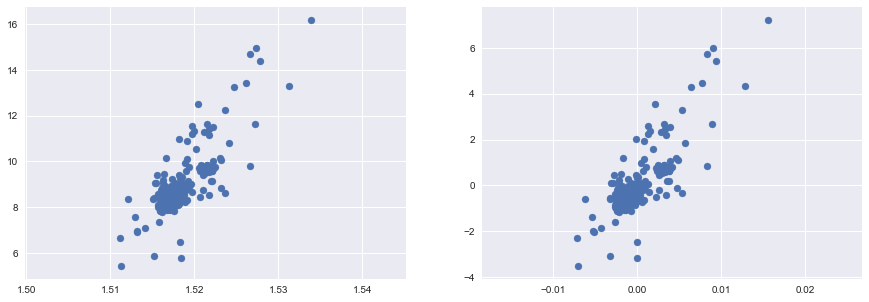

In [4]:
# view original data
plt.figure(figsize=(15,5))
plt.subplot(121); plt.scatter(gladd_data_2d[:,0],gladd_data_2d[:,1]);
plt.subplot(122); plt.scatter(gladd_data_2d_cen[:,0], gladd_data_2d_cen[:,1]); 
plt.show()

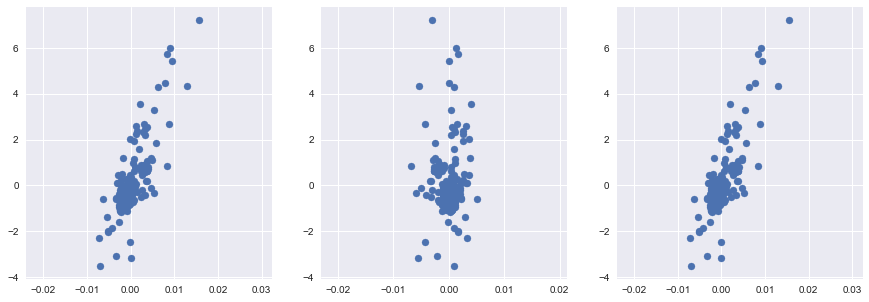

In [14]:
# perform pca on 2D
my_cov             = gladd_data_2d_cen.T @ gladd_data_2d_cen /(gladd_data_2d_cen.shape[0]-1)
eigvalue,eigvector = np.linalg.eigh(my_cov)
sorted_index       = np.argsort(eigvalue)
projection_vector  = eigvector[:,sorted_index]
projected_data     = gladd_data_2d_cen   @ projection_vector
recovered_data     = projected_data      @ np.linalg.inv(projection_vector)

plt.figure(figsize=(15,5))
plt.subplot(131); plt.scatter(gladd_data_2d_cen[:,0], gladd_data_2d_cen[:,1]); 
plt.subplot(132); plt.scatter(projected_data[:,0],projected_data[:,1]); 
plt.subplot(133); plt.scatter(recovered_data[:,0],recovered_data[:,1]);
plt.show()

[[-0.9999985   0.00172932]
 [ 0.00172932  0.9999985 ]]
[0.25086462 0.24913535]
[[-0.50086313  0.00086615]
 [ 0.00086316  0.49913386]]


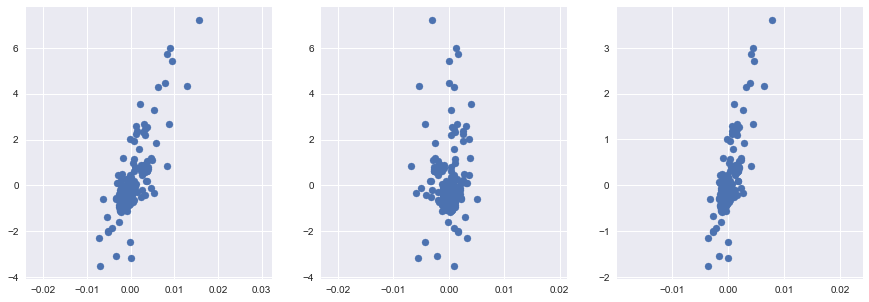

In [87]:
# recover but strangely
my_cov             = gladd_data_2d_cen.T @ gladd_data_2d_cen /(gladd_data_2d_cen.shape[0]-1)
eigvalue,eigvector = np.linalg.eigh(my_cov)
sorted_index       = np.argsort(eigvalue)
projection_vector  = eigvector[:,sorted_index]
projected_data     = gladd_data_2d_cen   @ projection_vector

inverse_vector = np.linalg.inv(projection_vector)
print(inverse_vector)

# 0 - respect to the coloum - each pair of x and y
# 1 - respect to the row    - each x's and y's
inverse_vector = inverse_vector*inverse_vector.std(1,keepdims=True)
print(inverse_vector.std(1))
print(inverse_vector)

recovered_data     = projected_data      @ inverse_vector

plt.figure(figsize=(15,5))
plt.subplot(131); plt.scatter(gladd_data_2d_cen[:,0], gladd_data_2d_cen[:,1]); 
plt.subplot(132); plt.scatter(projected_data[:,0],projected_data[:,1]); 
plt.subplot(133); plt.scatter(recovered_data[:,0],recovered_data[:,1]);
plt.show()

In [56]:
# import library
import tensorflow as tf
import numpy as np
import sys, os,cv2
from scipy.misc import imread,imresize
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from imgaug import augmenters as iaa
import imgaug as ia
from scipy.ndimage import zoom
from sklearn.utils import shuffle
import matplotlib.animation as animation
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs,make_moons,make_swiss_roll

plt.style.use('seaborn')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

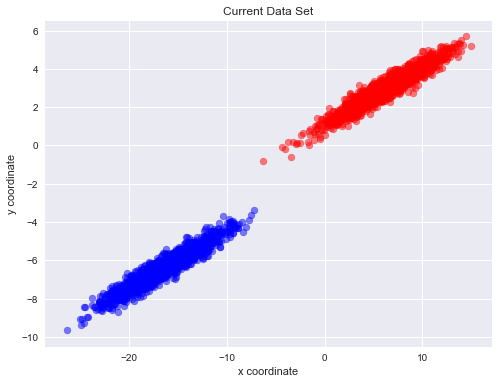

In [80]:
# load some data set
n_samples = 4000
X, y = make_blobs(n_samples=n_samples, random_state=123)
transformation = np.asarray([
    [3,1],
    [1,0]
])
X = X @ transformation
X = X - X.mean(0)
plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red',  alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.title('Current Data Set'); plt.ylabel('y coordinate'); plt.xlabel('x coordinate'); plt.grid(True)
plt.show()

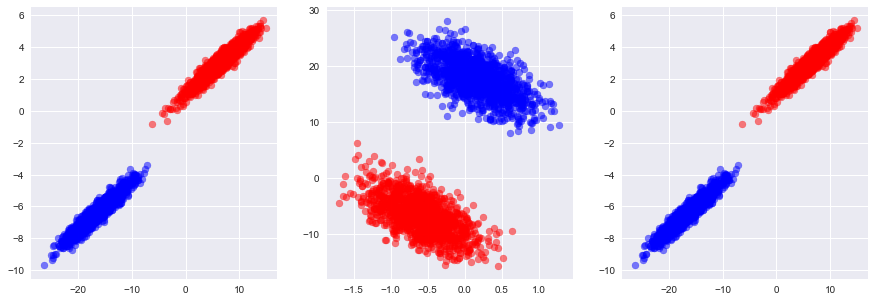

In [81]:
# perform pca on 2D
my_cov             = X.T @ X /(X.shape[0]-1)
eigvalue,eigvector = np.linalg.eigh(my_cov)
sorted_index       = np.argsort(eigvalue)
projection_vector  = eigvector[:,sorted_index]
projected_data     = X   @ projection_vector
recovered_data     = projected_data      @ np.linalg.inv(projection_vector)

plt.figure(figsize=(15,5))
plt.subplot(131); 
plt.scatter(X[y==0, 0], X[y==0, 1], color='red',  alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.subplot(132); 
plt.scatter(projected_data[y==0, 0], projected_data[y==0, 1], color='red',  alpha=0.5)
plt.scatter(projected_data[y==1, 0], projected_data[y==1, 1], color='blue', alpha=0.5)

plt.subplot(133); 
plt.scatter(recovered_data[y==0, 0], recovered_data[y==0, 1], color='red',  alpha=0.5)
plt.scatter(recovered_data[y==1, 0], recovered_data[y==1, 1], color='blue', alpha=0.5)

plt.show()

[[ 0.35280162 -0.93569814]
 [-0.93569814 -0.35280162]]


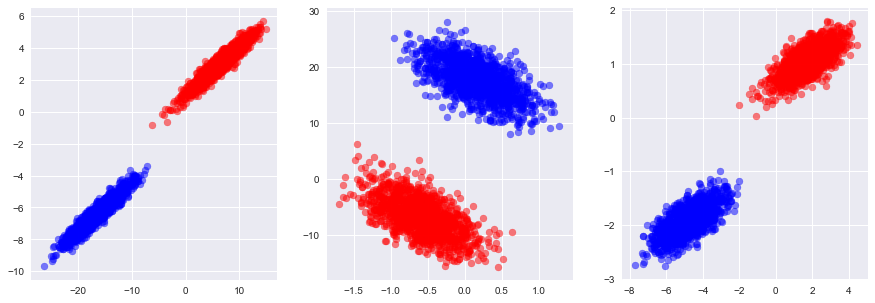

In [96]:
# perform pca on 2D
my_cov             = X.T @ X /(X.shape[0]-1)
eigvalue,eigvector = np.linalg.eigh(my_cov)
sorted_index       = np.argsort(eigvalue)
projection_vector  = eigvector[:,sorted_index]
projected_data     = X   @ projection_vector

projection_vector  = np.linalg.inv(projection_vector)
print(projection_vector)
projection_vector  = projection_vector * projection_vector.std(1,keepdims=True)
recovered_data     = projected_data      @ projection_vector

plt.figure(figsize=(15,5))
plt.subplot(131); 
plt.scatter(X[y==0, 0], X[y==0, 1], color='red',  alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
    
plt.subplot(132); 
plt.scatter(projected_data[y==0, 0], projected_data[y==0, 1], color='red',  alpha=0.5)
plt.scatter(projected_data[y==1, 0], projected_data[y==1, 1], color='blue', alpha=0.5)

plt.subplot(133); 
plt.scatter(recovered_data[y==0, 0], recovered_data[y==0, 1], color='red',  alpha=0.5)
plt.scatter(recovered_data[y==1, 0], recovered_data[y==1, 1], color='blue', alpha=0.5)

plt.show()

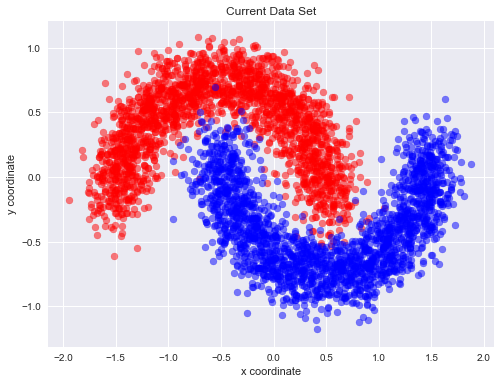

In [105]:
# load some data set
n_samples = 4000
X, y = make_moons(n_samples=n_samples, random_state=13,noise=0.15)
X    = X - X.mean(0,keepdims=True)
plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red',  alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.title('Current Data Set'); plt.ylabel('y coordinate'); plt.xlabel('x coordinate'); plt.grid(True)
plt.show()

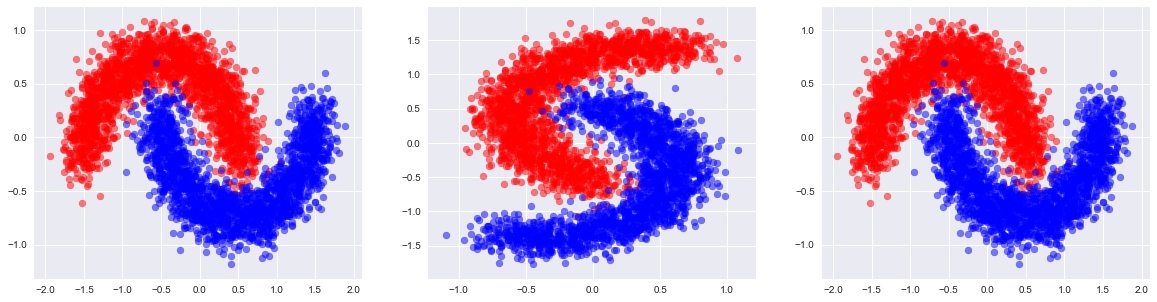

In [109]:
# perform pca on 2D
my_cov             = X.T @ X /(X.shape[0]-1)
eigvalue,eigvector = np.linalg.eigh(my_cov)
sorted_index       = np.argsort(eigvalue)
projection_vector  = eigvector[:,sorted_index]
projected_data     = X   @ projection_vector
recovered_data     = projected_data      @ np.linalg.inv(projection_vector)

plt.figure(figsize=(20,5))
plt.subplot(131); 
plt.scatter(X[y==0, 0], X[y==0, 1], color='red',  alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.subplot(132); 
plt.scatter(projected_data[y==0, 0], projected_data[y==0, 1], color='red',  alpha=0.5)
plt.scatter(projected_data[y==1, 0], projected_data[y==1, 1], color='blue', alpha=0.5)

plt.subplot(133); 
plt.scatter(recovered_data[y==0, 0], recovered_data[y==0, 1], color='red',  alpha=0.5)
plt.scatter(recovered_data[y==1, 0], recovered_data[y==1, 1], color='blue', alpha=0.5)

plt.show()

In [51]:
# get the cov and perform pca
my_cov = iris_data_np.T @ iris_data_np /(iris_data_np.shape[0]-1)
eigvalue,eigvector = np.linalg.eigh(my_cov)
sorted_index       = np.argsort(eigvalue)
projection_vector  = eigvector[:,sorted_index]
projected_data     = iris_data_np   @ projection_vector
recovered_data     = projected_data @ np.linalg.inv(projection_vector)
print(projection_vector.shape); sns.heatmap(my_cov); plt.show()
print('Projection Vector : \n',projection_vector)

NameError: name 'iris_data_np' is not defined

[[ 0.3198536  -0.94746697]
 [-0.94746697 -0.3198536 ]]


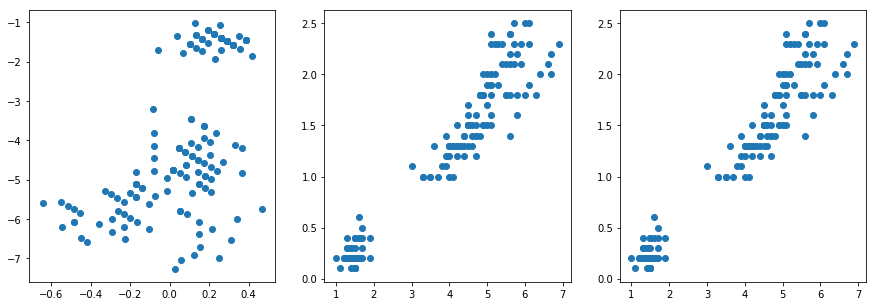

In [117]:
# view original data
print(projection_vector)
plt.figure(figsize=(15,5))
plt.subplot(131); plt.scatter(projected_data[:,0],projected_data[:,1]); 
plt.subplot(132); plt.scatter(recovered_data[:,0],recovered_data[:,1]);
plt.subplot(133); plt.scatter(iris_data_np[:,0],iris_data_np[:,1]); 
plt.show()

[ 0.06004034 19.304392  ]
[[ 0.3198536  -0.94746697]
 [-0.94746697 -0.3198536 ]]
[[ 0.         -0.94746697]
 [ 0.         -0.3198536 ]]


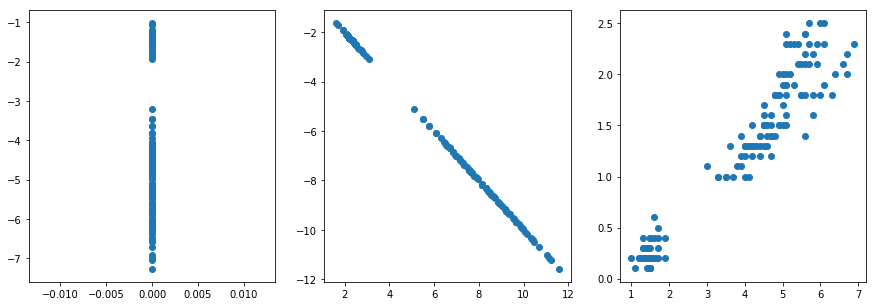

In [122]:
print(eigvalue[sorted_index]);print(eigvector)
reducing_projection_mat = projection_vector[:,-1:] 
added_mat = np.zeros((2,1))
reducing_projection_mat = np.hstack((added_mat,reducing_projection_mat))
reduced_data      = iris_data_np   @ reducing_projection_mat
reconstructed_data= reduced_data   @ np.linalg.inv(reducing_projection_mat+1e-8)
print(reducing_projection_mat)
plt.figure(figsize=(15,5))
plt.subplot(131); plt.scatter(reduced_data      [:,0],reduced_data      [:,1]); 
plt.subplot(132); plt.scatter(reconstructed_data[:,0],reconstructed_data[:,1]);
plt.subplot(133); plt.scatter(iris_data_np      [:,0],iris_data_np      [:,1]); 
plt.show()

[ 0.06004034 19.304392  ]
[[ 0.3198536  -0.94746697]
 [-0.94746697 -0.3198536 ]]
[[0.]
 [1.]]
[[0. 0.]
 [0. 1.]]


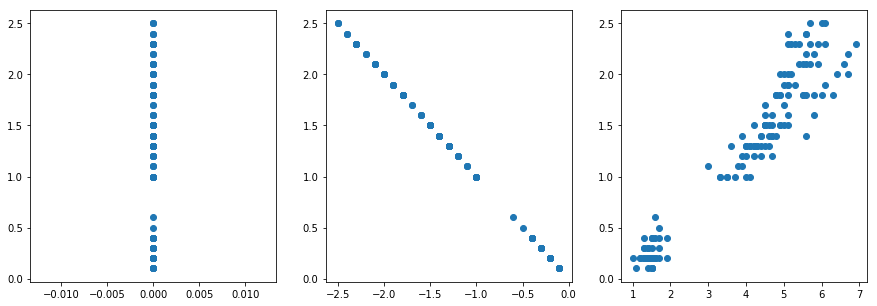

In [125]:
print(eigvalue[sorted_index]);print(eigvector)
reducing_projection_mat = projection_vector[:,-1:] 
reducing_projection_mat = (reducing_projection_mat-reducing_projection_mat.min())/(reducing_projection_mat.max()-reducing_projection_mat.min())
print(reducing_projection_mat)
added_mat = np.zeros((2,1))
reducing_projection_mat = np.hstack((added_mat,reducing_projection_mat))
reduced_data      = iris_data_np   @ reducing_projection_mat
reconstructed_data= reduced_data   @ np.linalg.inv(reducing_projection_mat+1e-8)
print(reducing_projection_mat)
plt.figure(figsize=(15,5))
plt.subplot(131); plt.scatter(reduced_data      [:,0],reduced_data      [:,1]); 
plt.subplot(132); plt.scatter(reconstructed_data[:,0],reconstructed_data[:,1]);
plt.subplot(133); plt.scatter(iris_data_np      [:,0],iris_data_np      [:,1]); 
plt.show()

[ 0.06004034 19.304392  ]
[[ 0.3198536  -0.94746697]
 [-0.94746697 -0.3198536 ]]
[[0.94746697]
 [0.3198536 ]]
[[0.         0.94746697]
 [0.         0.3198536 ]]


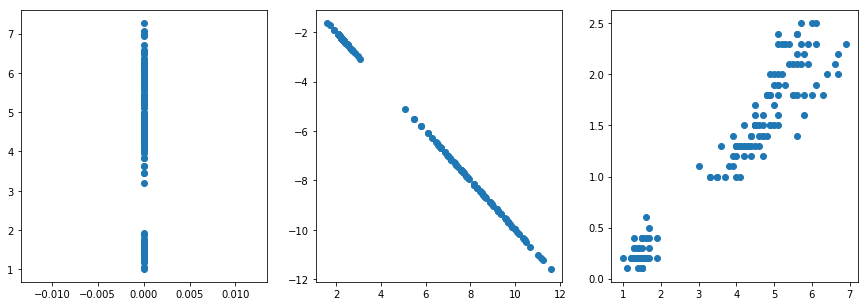

In [126]:
print(eigvalue[sorted_index]);print(eigvector)
reducing_projection_mat = projection_vector[:,-1:] 
reducing_projection_mat = np.sqrt(reducing_projection_mat**2)
print(reducing_projection_mat)
added_mat = np.zeros((2,1))
reducing_projection_mat = np.hstack((added_mat,reducing_projection_mat))
reduced_data      = iris_data_np   @ reducing_projection_mat
reconstructed_data= reduced_data   @ np.linalg.inv(reducing_projection_mat+1e-8)
print(reducing_projection_mat)
plt.figure(figsize=(15,5))
plt.subplot(131); plt.scatter(reduced_data      [:,0],reduced_data      [:,1]); 
plt.subplot(132); plt.scatter(reconstructed_data[:,0],reconstructed_data[:,1]);
plt.subplot(133); plt.scatter(iris_data_np      [:,0],iris_data_np      [:,1]); 
plt.show()

[ 0.06004034 19.304392  ]
[[ 0.3198536  -0.94746697]
 [-0.94746697 -0.3198536 ]]
[[-0.947467  ]
 [-0.31985363]]
[[ 0.         -0.94746703]
 [ 0.         -0.31985363]]


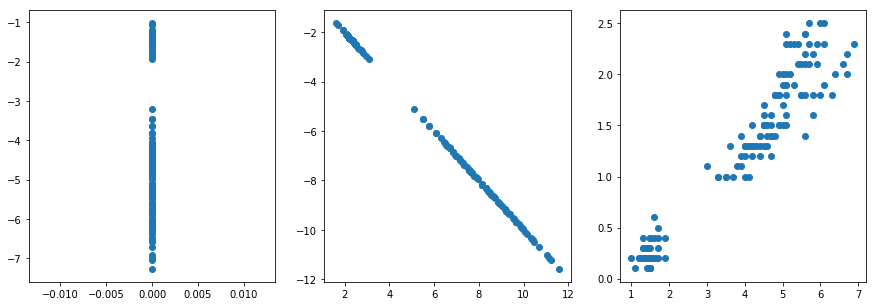

In [128]:
print(eigvalue[sorted_index]);print(eigvector)
reducing_projection_mat = projection_vector[:,-1:] 
reducing_projection_mat = reducing_projection_mat/np.linalg.norm(reducing_projection_mat)
print(reducing_projection_mat)
added_mat = np.zeros((2,1))
reducing_projection_mat = np.hstack((added_mat,reducing_projection_mat))
reduced_data      = iris_data_np   @ reducing_projection_mat
reconstructed_data= reduced_data   @ np.linalg.inv(reducing_projection_mat+1e-8)
print(reducing_projection_mat)
plt.figure(figsize=(15,5))
plt.subplot(131); plt.scatter(reduced_data      [:,0],reduced_data      [:,1]); 
plt.subplot(132); plt.scatter(reconstructed_data[:,0],reconstructed_data[:,1]);
plt.subplot(133); plt.scatter(iris_data_np      [:,0],iris_data_np      [:,1]); 
plt.show()

[[ 0.3198536  -0.94746697]
 [-0.94746697 -0.3198536 ]]
[[0.3198536  0.94746697]
 [0.94746697 0.3198536 ]]
[[-0.40213564  1.191202  ]
 [ 1.191202   -0.40213564]]


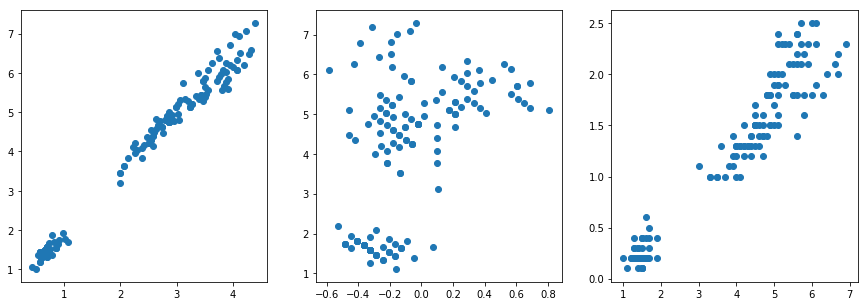

In [149]:
reducing_projection_mat = projection_vector                      ;print(reducing_projection_mat)

reducing_projection_mat = np.sqrt(reducing_projection_mat**2)   ;print(reducing_projection_mat)

back_og_data_space = np.linalg.inv(reducing_projection_mat)     ;print(back_og_data_space)



reduced_data      = iris_data_np   @ reducing_projection_mat
reconstructed_data= iris_data_np   @ back_og_data_space

plt.figure(figsize=(15,5))
plt.subplot(131); plt.scatter(reduced_data      [:,0],reduced_data      [:,1]); 
plt.subplot(132); plt.scatter(reconstructed_data[:,0],reconstructed_data[:,1]);
plt.subplot(133); plt.scatter(iris_data_np      [:,0],iris_data_np      [:,1]); 
plt.show()

[[ 0.3198536  -0.94746697]
 [-0.94746697 -0.3198536 ]]
[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]]


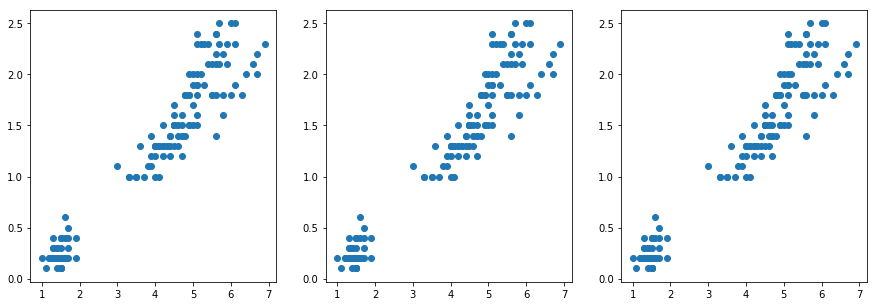

In [157]:
reducing_projection_mat = projection_vector                      ;print(reducing_projection_mat)

reducing_projection_mat = (reducing_projection_mat-reducing_projection_mat.min(1))/(reducing_projection_mat.max(1)-reducing_projection_mat.min(1))
print(reducing_projection_mat)

back_og_data_space = np.linalg.inv(reducing_projection_mat)     ;print(back_og_data_space)



reduced_data      = iris_data_np   @ reducing_projection_mat
reconstructed_data= iris_data_np   @ back_og_data_space

plt.figure(figsize=(15,5))
plt.subplot(131); plt.scatter(reduced_data      [:,0],reduced_data      [:,1]); 
plt.subplot(132); plt.scatter(reconstructed_data[:,0],reconstructed_data[:,1]);
plt.subplot(133); plt.scatter(iris_data_np      [:,0],iris_data_np      [:,1]); 
plt.show()

[[ 0.3198536  -0.94746697]
 [-0.94746697 -0.3198536 ]]
[[ 1.        -0.9999999]
 [-1.         1.0000001]]
[[4194304.5 4194303.5]
 [4194304.  4194304. ]]


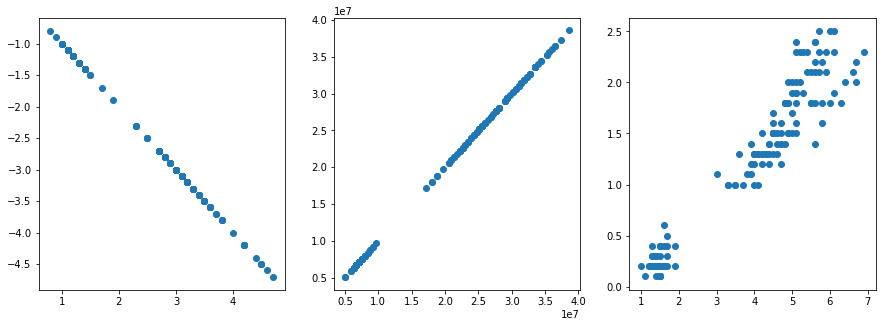

In [158]:
reducing_projection_mat = projection_vector                      ;print(reducing_projection_mat)

reducing_projection_mat = (reducing_projection_mat-reducing_projection_mat.mean(1))/(reducing_projection_mat.std(1))
print(reducing_projection_mat)

back_og_data_space = np.linalg.inv(reducing_projection_mat)     ;print(back_og_data_space)


reduced_data      = iris_data_np   @ reducing_projection_mat
reconstructed_data= iris_data_np   @ back_og_data_space

plt.figure(figsize=(15,5))
plt.subplot(131); plt.scatter(reduced_data      [:,0],reduced_data      [:,1]); 
plt.subplot(132); plt.scatter(reconstructed_data[:,0],reconstructed_data[:,1]);
plt.subplot(133); plt.scatter(iris_data_np      [:,0],iris_data_np      [:,1]); 
plt.show()

[[ 0.3198536  -0.94746697]
 [-0.94746697 -0.3198536 ]]
[[ 1.        -0.9999999]
 [-1.         1.0000001]]
[[4194304.5 4194303.5]
 [4194304.  4194304. ]]
[1. 0.]
[[ 0.990991    0.20408162]
 [ 1.8032787  10.        ]]


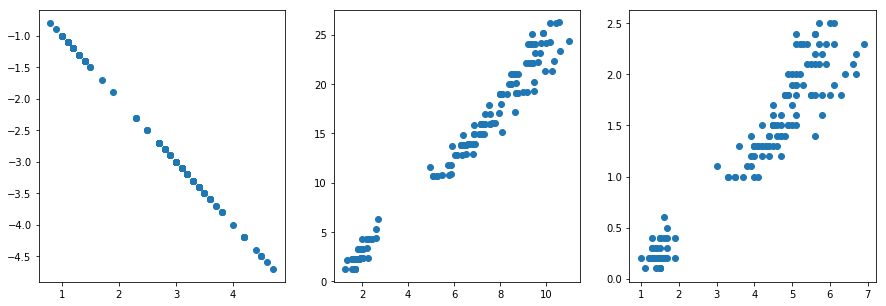

In [193]:
reducing_projection_mat = projection_vector                      ;print(reducing_projection_mat)

reducing_projection_mat = (reducing_projection_mat-reducing_projection_mat.mean(1))/(reducing_projection_mat.std(1))
print(reducing_projection_mat)

back_og_data_space = np.linalg.inv(reducing_projection_mat) 
print(back_og_data_space)
print((back_og_data_space.max(1)-back_og_data_space.min(1)))
back_og_data_space = (back_og_data_space-back_og_data_space.min(1)[None,:])/(back_og_data_space.max(1)-back_og_data_space.min(1)+0.1)[None,:]
back_og_data_space = 1/np.abs(back_og_data_space+0.1)
print(back_og_data_space)

reduced_data      = iris_data_np   @ reducing_projection_mat
reconstructed_data= iris_data_np   @ back_og_data_space

plt.figure(figsize=(15,5))
plt.subplot(131); plt.scatter(reduced_data      [:,0],reduced_data      [:,1]); 
plt.subplot(132); plt.scatter(reconstructed_data[:,0],reconstructed_data[:,1]);
plt.subplot(133); plt.scatter(iris_data_np      [:,0],iris_data_np      [:,1]); 
plt.show()

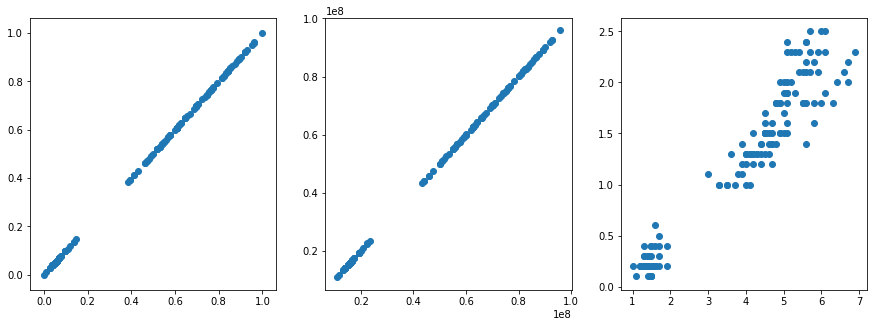

In [167]:
reconstructed_data_what = (reconstructed_data-reconstructed_data.mean(0))/reconstructed_data.std(0)
reconstructed_data_what = (reconstructed_data-reconstructed_data.min(0))/(reconstructed_data.max(0)-reconstructed_data.min(0))


plt.figure(figsize=(15,5))
plt.subplot(131); plt.scatter(reconstructed_data_what      [:,0],reconstructed_data_what      [:,1]); 
plt.subplot(132); plt.scatter(reconstructed_data[:,0],reconstructed_data[:,1]);
plt.subplot(133); plt.scatter(iris_data_np      [:,0],iris_data_np      [:,1]); 
plt.show()

# Reference
1. https://stackoverflow.com/questions/21030391/how-to-normalize-an-array-in-numpy
2. Customizing plots with style sheets — Matplotlib 1.5.3 documentation. (2018). Matplotlib.org. Retrieved 24 October 2018, from https://matplotlib.org/users/style_sheets.html
3.

In [109]:
! git add .
! git commit -m 'from mac'
! git push

[master cd125de1] from mac
 2 files changed, 44 insertions(+), 49 deletions(-)
Counting objects: 6, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 59.15 KiB | 2.19 MiB/s, done.
Total 6 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/JaeDukSeo/Daily-Neural-Network-Practice-2
   d040dbca..cd125de1  master -> master
